# For alvaro

In [1]:
import numpy as np
import pylab as pl
from scipy.io import loadmat
from scipy.spatial.transform import Rotation as R


In [2]:
chanmaps_jobs = ['298','299','300','301']


In [32]:
def get_probetrack(ML, AP, th, ph, ro, depth, shank, chanmap):
    
    # Step 1: Convert degrees to radiants and reformat chanmap
    phi   = ph*np.pi/180
    theta = th*np.pi/180
    roll  = ro*np.pi/180
    x = np.array([i[0] for i in chanmap['xcoords']]);
    y = np.array([i[0] for i in chanmap['ycoords']]);
    k = np.array([i[0] for i in chanmap['kcoords']]);

    print(k)

    # Step 2: Transform them into 3D, assuming the Probe is perpendicular to x|y plane
    avx           = np.mean(x[k==shank])                                  # Center "X" on middle of probe
    probe_x0      = np.array([np.cos(roll)*avx, -np.sin(roll)*avx])       # coordinates of the shank after "roll" around probe axis
    probe_length  = np.max(y[k==shank]) - np.min(y[k==shank])             # Length off the probe per chanmap
    probe_unitVec = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]) # Unit vector point along insertion direction
    probe_length  = np.arange(-depth, -depth + probe_length, 10)          # Resulution of future xyz_pick.json file


    # Step 3: Produce the 3D coordinates along the probe track
    probe_track = np.zeros((len(probe_length),3))
    for i in range(len(probe_length)):
        probe_track[i,:] = probe_length[i]*probe_unitVec + np.array([probe_x0[0], probe_x0[1], 0])
    
    # Step 4: Shift probe my ML|AP insertion coordinates
    probe_track_shifted = np.zeros((probe_track.shape))
    for i in range(len(probe_track_shifted)):
        probe_track_shifted[i,:] = probe_track[i,:] + np.array([ML, AP, 0])
    return probe_track_shifted

def track_to_xyz(track):
    dict = {}
    dict["xyz_picks"] = np.array(track)
    return dict

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

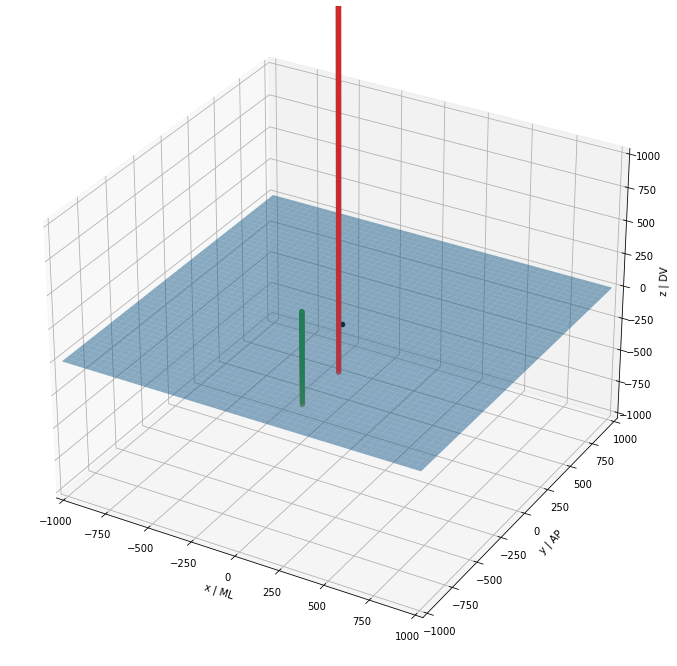

In [33]:
fig = pl.figure(figsize = (12,12))
ax = fig.add_subplot(111,projection='3d')

for i in range(4):
    job_id = chanmaps_jobs[i]
    chanmap_filepath = f'/Volumes/braininit/Shared/TestData/ChanMapFiles/chanmap_{job_id}.mat'
    chanmap = loadmat(chanmap_filepath)
    pt = get_probetrack(ML=0, AP=0, th=0, ph=0, ro=90, depth=350, shank=i+1, chanmap=chanmap)
    ax.scatter(pt[:,0], pt[:,1], pt[:,2])

# Just for plotting:
xx, yy = np.meshgrid(range(-1000,1000), range(-1000,1000))
ax.plot_surface(xx, yy, 0*xx, alpha=0.5)
ax.scatter(xs=0, ys=0, zs=0, c='k')
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
ax.set_zlim(-1000,1000)
ax.set_xlabel("x | ML")
ax.set_ylabel("y | AP")
ax.set_zlabel("z | DV");

In [10]:
# track_to_xyz(pt)